In [22]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.pandas.set_option('display.max_columns', None)

import pickle
import warnings
warnings.simplefilter(action='ignore')

import eli5

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression, SelectPercentile, SelectFromModel
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import ElasticNet
from xgboost.sklearn import XGBRegressor

In [2]:
project_path = r'C:\Users\kchanas\Documents\Learning\Kaggle\House Prices'
X_train = pd.read_csv(os.path.join(project_path, r'data\X_train.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(project_path, r'data\y_train.csv'), index_col=0, names=['SalePrice'])

In [3]:
X_train.shape
X_train.head()

(1168, 76)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivAndBsmtArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
922,-0.882943,0.361626,-0.046853,-0.076360,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,-1.041421,-2.333072,0.106092,-2.882178,-1.802319,-0.828481,1.263326,2.372968,-0.848541,-0.506716,-0.135309,-1.381651,-1.495637,-0.770043,-0.835334,-0.724563,0.325226,-0.655392,-0.672194,0.087531,-0.609160,-0.226722,1.070444,0.327610,-0.344636,-0.738332,0.495982,0.14264,-0.165354,0.260080,0.260130,0.410889,1.206368,-0.112458,1.279270,2.997177,-0.246796,0.784304,3.211155,1.378044,4.335645,-0.807123,1.507705,0.243828,-0.955827,-0.953355,-2.678136,2.470810,-1.962758,-2.417038,-2.565187,-3.669112,-3.813887,-3.758568,-0.962505,0.895953,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,1.007787,0.133139,-0.007204,0.188693,1.101861
521,-1.400783,0.361626,-0.392785,0.327824,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,-1.382430,0.249893,0.106092,-4.389739,1.240845,-1.558795,1.263326,2.372968,-0.702569,-0.506716,-0.135309,-1.381651,-1.495637,-0.770043,-0.835334,-0.724563,0.325226,-1.505945,-3.242154,-4.559553,-1.536799,-2.690080,-1.362385,-4.184757,-0.344636,-2.053581,-3.137031,0.14264,-1.209317,-3.844969,-1.925714,-1.486152,1.127303,-0.112458,-0.328128,-0.839209,-0.246796,0.784304,-0.753569,0.155906,4.335645,-0.807123,0.277527,0.243828,-0.955827,-0.953355,-2.678136,2.470810,-1.962758,-2.417038,-2.565187,-3.669112,-3.813887,-3.758568,1.111054,1.129371,2.434012,-0.117533,-0.304319,-0.064715,-0.090533,0.635760,0.133139,-0.007204,0.188693,-1.960623
402,0.152736,0.361626,-0.143340,-0.078574,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218285,0.663625,0.249893,0.106092,0.132944,-0.280737,0.632147,-0.537241,-1.156800,-1.043169,-0.506716,-0.135309,0.919350,0.961825,-0.770043,-0.835334,1.020364,0.325226,1.045714,0.612786,0.087531,1.246118,1.004957,-0.701864,0.327610,-0.344636,1.354299,0.575473,0.14264,0.878610,0.260080,0.260130,0.501841,-0.853809,-0.112458,-0.291357,-0.839209,-0.246796,0.784304,-0.753569,0.155906,-0.222441,0.710944,-0.337562,0.243828,0.586170,1.245826,0.565060,-1.076914,1.425175,0.306648,-0.292312,0.287973,0.299336,0.289387,-0.962505,-1.078858,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,0.263732,-1.376628,2.096239,1.336575,0.152355
281,1.188416,0.361626,0.626159,0.414103,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,0.322616,0.249893,0.106092,0.132944,1.240845,0.632147,0.363042,-0.595996,-0.215999,-0.506716,-0.135309,0.152349,0.259693,0.733988,1.309082,1.020364,0.325226,-0.655392,0.612786,0.087531,1.246118,1.004957,0.470521,0.327610,-0.344636,-0.164851,-0.537816,0.14264,-0.165354,0.260080,0.260130,0.165245,1.181578,-0.112458,0.960071,-0.839209,-0.246796,0.784304,1.228793,0.155906,-0.222441,0.710944,0.277527,0.243828,0.586170,0.512766,0.565060,-0.507939,1.425175,0.306648,0.500314,0.287973,0.299336,0.289387,-0.962505,0.982818,-0.411301,6.186724,-0.304319,-0.064715,-0.090533,-1.968434,-0.621744,-0.007204,0.188693,0.357599
1402,1.188416,0.361626,-0.291537,-0.403086,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218285,-0.018393,0.249893,0.106092,0.132944,1.240845,-0.098167,-0.537241,-1.057834,-0.897198,-0.506

In [4]:
y_train = np.log(y_train)
y_train.head()

,SalePrice
922,11.890677
521,11.573550
402,12.013640
281,12.339291
1402,12.170445


In the next lines of code I will try out different methods of feature importance assesment and rank variables using each of these methods. The final subset of features will be selected basing on the sum of rankings coming from these methods.

## Feature importance based on correlation with SalePrice

In [5]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr = np.abs(corr)
imp_corr = corr['SalePrice'].sort_values(ascending=False).reset_index().rename(columns = 
                                                                               {'index': 'Feature', 'SalePrice': 'Correlation'})
imp_corr['Corr_Rank'] = imp_corr['Correlation'].rank(ascending=False) - 1
# delete SalePrice from ranking
imp_corr = imp_corr[imp_corr['Corr_Rank']>0].set_index('Feature')
imp_corr.head(10)

,Correlation,Corr_Rank
Feature,,
OverallQual,0.809968,1.0
GrLivAndBsmtArea,0.800648,2.0
GrLivArea,0.726631,3.0
Neighborhood,0.725493,4.0
GarageCars,0.681125,5.0
ExterQual,0.667004,6.0
KitchenQual,0.649039,7.0
GarageArea,0.648687,8.0
BsmtQual,0.639780,9.0


## Feature importance from models

In [6]:
en = ElasticNet(alpha=0.01, random_state=1)
en.fit(X_train, y_train)
imp_en = pd.DataFrame(np.abs(en.coef_), index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
imp_en['En_Rank'] = imp_en['Importance'].rank(ascending=False)
imp_en.head(10)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

,Importance,En_Rank
GrLivArea,0.081955,1.0
OverallQual,0.071275,2.0
Neighborhood,0.061644,3.0
GrLivAndBsmtArea,0.044447,4.0
GarageCars,0.039989,5.0
OverallCond,0.037872,6.0
LotArea,0.027055,7.0
1stFlrSF,0.021292,8.0
SaleCondition,0.021037,9.0
BsmtFinSF1,0.020119,10.0


In [7]:
rf = RandomForestRegressor(n_estimators=200, random_state=1)
rf.fit(X_train, y_train)
imp_rf = pd.DataFrame(rf.feature_importances_, 
                      index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
imp_rf['Rf_Rank'] = imp_rf['Importance'].rank(ascending=False)
imp_rf.head(10)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

,Importance,Rf_Rank
OverallQual,0.420302,1.0
GrLivAndBsmtArea,0.314940,2.0
Neighborhood,0.057546,3.0
GrLivArea,0.017140,4.0
YearRemodAdd,0.013339,5.0
LotArea,0.011847,6.0
GarageArea,0.010323,7.0
BsmtFinSF1,0.009714,8.0
CentralAir,0.009489,9.0
1stFlrSF,0.009256,10.0


In [8]:
xgb = XGBRegressor(n_estimators=200, random_state=1)
xgb.fit(X_train, y_train)
imp_xgb = pd.DataFrame(xgb.feature_importances_, 
                      index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
imp_xgb['Xgb_Rank'] = imp_rf['Importance'].rank(ascending=False)
imp_xgb.head(10)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

,Importance,Xgb_Rank
GarageFinish,0.291290,26.0
GarageCars,0.170912,16.0
GrLivAndBsmtArea,0.078442,2.0
KitchenQual,0.051078,20.0
FireplaceQu,0.048163,27.0
OverallQual,0.044213,1.0
Neighborhood,0.044038,3.0
GarageType,0.042586,17.0
CentralAir,0.028264,9.0
YearRemodAdd,0.020796,5.0


## Permutation Importance

In [9]:
en = ElasticNet(alpha=0.01, random_state=1)
en.fit(X_train, y_train)
perm = PermutationImportance(en, random_state=1).fit(X_train, y_train)
perm_imp_en = eli5.explain_weights_df(perm, feature_names = X_train.columns.tolist(), top=100)
perm_imp_en = perm_imp_en.set_index('feature')
perm_imp_en['Perm_En_Rank'] = perm_imp_en['weight'].rank(ascending=False)
perm_imp_en.head(10)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

,weight,std,Perm_En_Rank
feature,,,
GrLivArea,0.091305,0.002958,1.0
OverallQual,0.069522,0.003170,2.0
Neighborhood,0.053684,0.001774,3.0
GrLivAndBsmtArea,0.029289,0.001916,4.0
OverallCond,0.021981,0.002168,5.0
GarageCars,0.021479,0.000605,6.0
LotArea,0.010915,0.001041,7.0
1stFlrSF,0.006978,0.000852,8.0
SaleCondition,0.006618,0.001465,9.0


In [10]:
rf = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=1)
rf.fit(X_train, y_train)
perm = PermutationImportance(rf, random_state=1).fit(X_train, y_train)
perm_imp_rf = eli5.explain_weights_df(perm, feature_names = X_train.columns.tolist(), top=100)
perm_imp_rf = perm_imp_rf.set_index('feature')
perm_imp_rf['Perm_Rf_Rank'] = perm_imp_rf['weight'].rank(ascending=False)
perm_imp_rf.head(10)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

,weight,std,Perm_Rf_Rank
feature,,,
GrLivAndBsmtArea,0.401736,0.013199,1.0
OverallQual,0.249097,0.013904,2.0
Neighborhood,0.080761,0.003303,3.0
YearRemodAdd,0.019097,0.000682,4.0
GrLivArea,0.015607,0.000748,5.0
LotArea,0.011025,0.000474,6.0
GarageArea,0.009031,0.000598,7.0
BsmtFinSF1,0.008757,0.000162,8.0
OverallCond,0.007618,0.000446,9.0


In [11]:
xgb = XGBRegressor(n_estimators=200, random_state=1)
xgb.fit(X_train, y_train)
perm = PermutationImportance(xgb, random_state=1).fit(X_train, y_train)
perm_imp_xgb = eli5.explain_weights_df(perm, feature_names = X_train.columns.tolist(), top=100)
perm_imp_xgb = perm_imp_xgb.set_index('feature')
perm_imp_xgb['Perm_Xgb_Rank'] = perm_imp_xgb['weight'].rank(ascending=False)
perm_imp_xgb.head(10)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

,weight,std,Perm_Xgb_Rank
feature,,,
GrLivAndBsmtArea,0.240823,0.009452,1.0
OverallQual,0.061336,0.002009,2.0
Neighborhood,0.039392,0.001979,3.0
OverallCond,0.018203,0.001105,4.0
LotArea,0.015522,0.000756,5.0
YearRemodAdd,0.014733,0.001230,6.0
GrLivArea,0.013928,0.000465,7.0
BsmtFinSF1,0.008651,0.000234,8.0
KitchenQual,0.007592,0.000495,9.0


## Feature importances ranking

In [12]:
feat_imp_ranking = pd.concat([imp_corr, imp_en, imp_rf, imp_xgb, perm_imp_en, perm_imp_rf, perm_imp_xgb], axis=1)
rank_columns = [col for col in feat_imp_ranking if 'Rank' in col]
feat_imp_ranking = feat_imp_ranking[rank_columns]
feat_imp_ranking['Overall_Rank'] = feat_imp_ranking.sum(axis=1)
feat_imp_ranking = feat_imp_ranking.sort_values('Overall_Rank', ascending=True)
feat_imp_ranking.head(30)

,Corr_Rank,En_Rank,Rf_Rank,Xgb_Rank,Perm_En_Rank,Perm_Rf_Rank,Perm_Xgb_Rank,Overall_Rank
OverallQual,1.0,2.0,1.0,1.0,2.0,2.0,2.0,11.0
GrLivAndBsmtArea,2.0,4.0,2.0,2.0,4.0,1.0,1.0,16.0
Neighborhood,4.0,3.0,3.0,3.0,3.0,3.0,3.0,22.0
GrLivArea,3.0,1.0,4.0,4.0,1.0,5.0,7.0,25.0
LotArea,26.0,7.0,6.0,6.0,7.0,6.0,5.0,63.0
YearRemodAdd,16.0,17.0,5.0,5.0,16.0,4.0,6.0,69.0
GarageCars,5.0,5.0,16.0,16.0,6.0,20.0,11.0,79.0
1stFlrSF,10.0,8.0,10.0,10.0,8.0,11.0,26.0,83.0
BsmtFinSF1,46.0,10.0,8.0,8.0,10.0,8.0,8.0,98.0
KitchenQual,7.0,12.0,20.0,20.0,12.0,19.0,9.0,99.0


<Figure size 1080x1080 with 0 Axes>

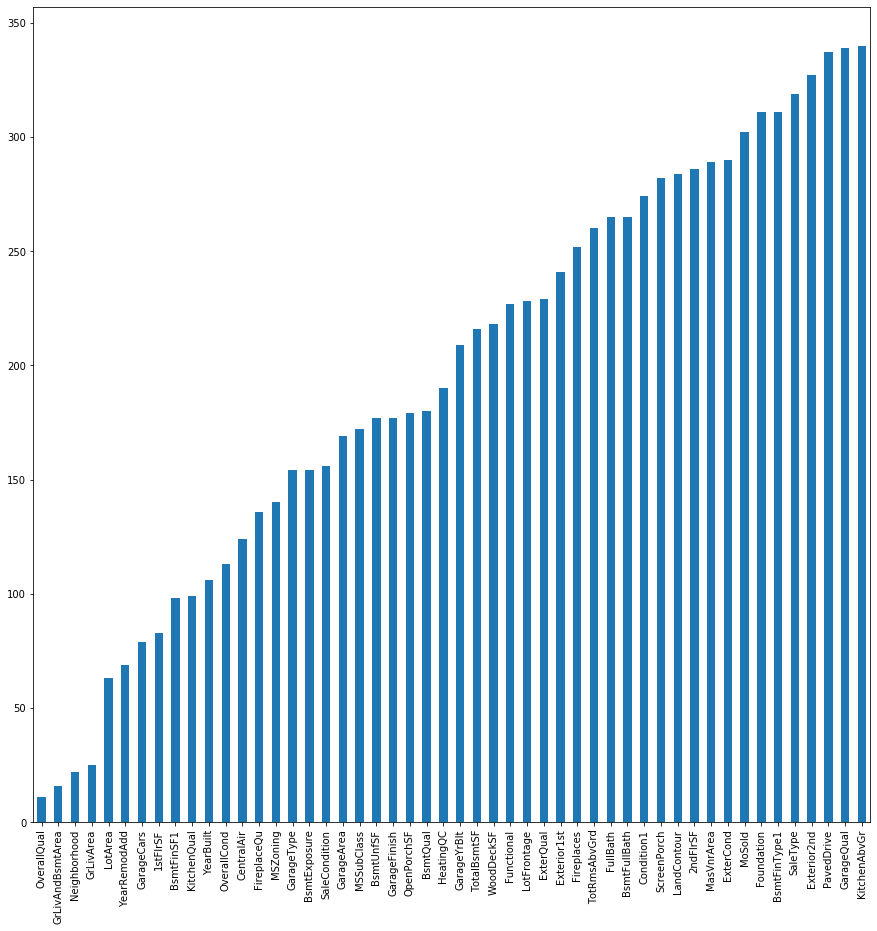

In [13]:
plt.figure(figsize=(15,15))
feat_imp_ranking['Overall_Rank'].head(50).plot.bar()

In [14]:
selected_features = feat_imp_ranking[feat_imp_ranking['Overall_Rank']<=156].index.tolist()
print(selected_features)

['OverallQual', 'GrLivAndBsmtArea', 'Neighborhood', 'GrLivArea', 'LotArea', 'YearRemodAdd', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', 'KitchenQual', 'YearBuilt', 'OverallCond', 'CentralAir', 'FireplaceQu', 'MSZoning', 'GarageType', 'BsmtExposure', 'SaleCondition']


In [19]:
cat_vars = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
            'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'GrLivAndBsmtArea']

discrete_vars = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']

temporal_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']

cat_vars = [var for var in cat_vars if var in selected_features]
num_vars = [var for var in num_vars if var in selected_features]
discrete_vars = [var for var in discrete_vars if var in selected_features]
temporal_vars = [var for var in temporal_vars if var in selected_features]

In [23]:
print('Categorical vars: ', cat_vars)
print('Numerical vars: ', num_vars)
print('Discrete vars: ', discrete_vars)
print('Temporal vars: ', temporal_vars)

Categorical vars:  ['MSZoning', 'Neighborhood', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'SaleCondition']
Numerical vars:  ['LotArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GrLivAndBsmtArea']
Discrete vars:  ['OverallQual', 'OverallCond', 'GarageCars']
Temporal vars:  ['YearBuilt', 'YearRemodAdd']


In [20]:
final_features = discrete_vars + cat_vars + num_vars + temporal_vars
final_features

['OverallQual',
 'OverallCond',
 'GarageCars',
 'MSZoning',
 'Neighborhood',
 'BsmtExposure',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'SaleCondition',
 'LotArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'GrLivArea',
 'GrLivAndBsmtArea',
 'YearBuilt',
 'YearRemodAdd']

In [21]:
with open(os.path.join(project_path, r'data\selected_features.txt'), "wb") as f:
      pickle.dump(final_features, f)